In [1]:
import pandas as pd

df = pd.read_csv("nepal_earthquakes.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   B.S. Date   1254 non-null   object 
 1   A.D. Date   1254 non-null   object 
 2   Local Time  1254 non-null   object 
 3   Latitude    1254 non-null   object 
 4   Longitude   1254 non-null   object 
 5   Magnitude   1254 non-null   float64
 6   Epicenter   1254 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.7+ KB


In [2]:
df.head()

,B.S. Date,A.D. Date,Local Time,Latitude,Longitude,Magnitude,Epicenter
0,2081-12-21,2025-04-04,20:10,28.96,82.12,5.5,Jajarkot*
1,2081-12-21,2025-04-04,20:07,28.95,82.12,5.2,Jajarkot
2,2081-12-20,2025-04-03,17:04,30.02,80.84,4.0,Darchula
3,2081-12-12,2025-03-26,19:44,29.69,81.82,4.5,Humla
4,2081-12-12,2025-03-26,18:27,28.70,86.74,5.5,"Tingri, China"


In [4]:
df.describe(include='all')

,B.S. Date,A.D. Date,Local Time,Latitude,Longitude,Magnitude,Epicenter
count,1254,1254,1254,1254,1254,1254.000000,1254
unique,834,834,826,311,525,NaN,134
top,2072-01-12,2015-04-25,10:29,27.79,86.09,NaN,Dolakha
freq,45,45,6,24,12,NaN,196
mean,NaN,NaN,NaN,NaN,NaN,4.444179,NaN
std,NaN,NaN,NaN,NaN,NaN,0.499331,NaN
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.300000,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.600000,NaN


In [5]:
# Convert to datetime (assuming format is HH:MM)
df['Local Time'] = pd.to_datetime(df['Local Time'], format='%H:%M', errors='coerce')

# Extract the hour
df['Hour'] = df['Local Time'].dt.hour


In [6]:
df.head()

,B.S. Date,A.D. Date,Local Time,Latitude,Longitude,Magnitude,Epicenter,Hour
0,2081-12-21,2025-04-04,1900-01-01 20:10:00,28.96,82.12,5.5,Jajarkot*,20
1,2081-12-21,2025-04-04,1900-01-01 20:07:00,28.95,82.12,5.2,Jajarkot,20
2,2081-12-20,2025-04-03,1900-01-01 17:04:00,30.02,80.84,4.0,Darchula,17
3,2081-12-12,2025-03-26,1900-01-01 19:44:00,29.69,81.82,4.5,Humla,19
4,2081-12-12,2025-03-26,1900-01-01 18:27:00,28.70,86.74,5.5,"Tingri, China",18


C:\Users\tasee\AppData\Local\Temp\ipykernel_11940\1310602762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=epicenter_counts.head(10), x='Epicenter', y='Earthquake_Count', palette='viridis')


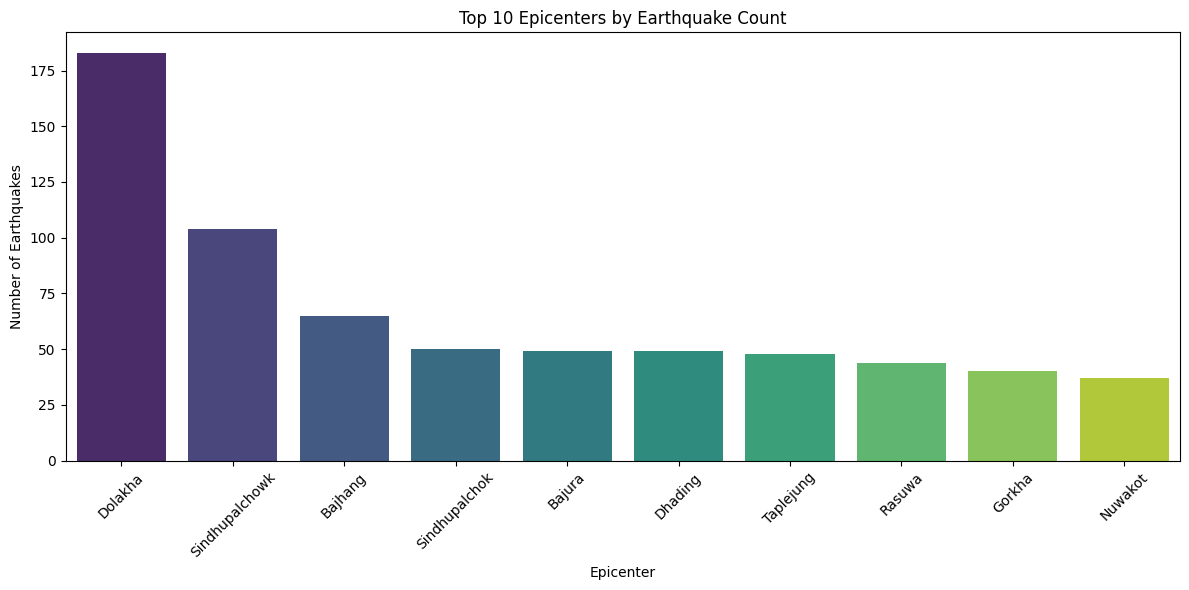

In [20]:


import matplotlib.pyplot as plt
import seaborn as sns

# Count earthquakes per epicenter
epicenter_counts = df['Epicenter'].value_counts().reset_index()
epicenter_counts.columns = ['Epicenter', 'Earthquake_Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=epicenter_counts.head(10), x='Epicenter', y='Earthquake_Count', palette='viridis')
plt.title('Top 10 Epicenters by Earthquake Count')
plt.xlabel('Epicenter')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\tasee\AppData\Local\Temp\ipykernel_11940\3346435630.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Magnitude', palette='coolwarm')
C:\Users\tasee\AppData\Local\Temp\ipykernel_11940\3346435630.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hour', y='Magnitude', palette='magma')


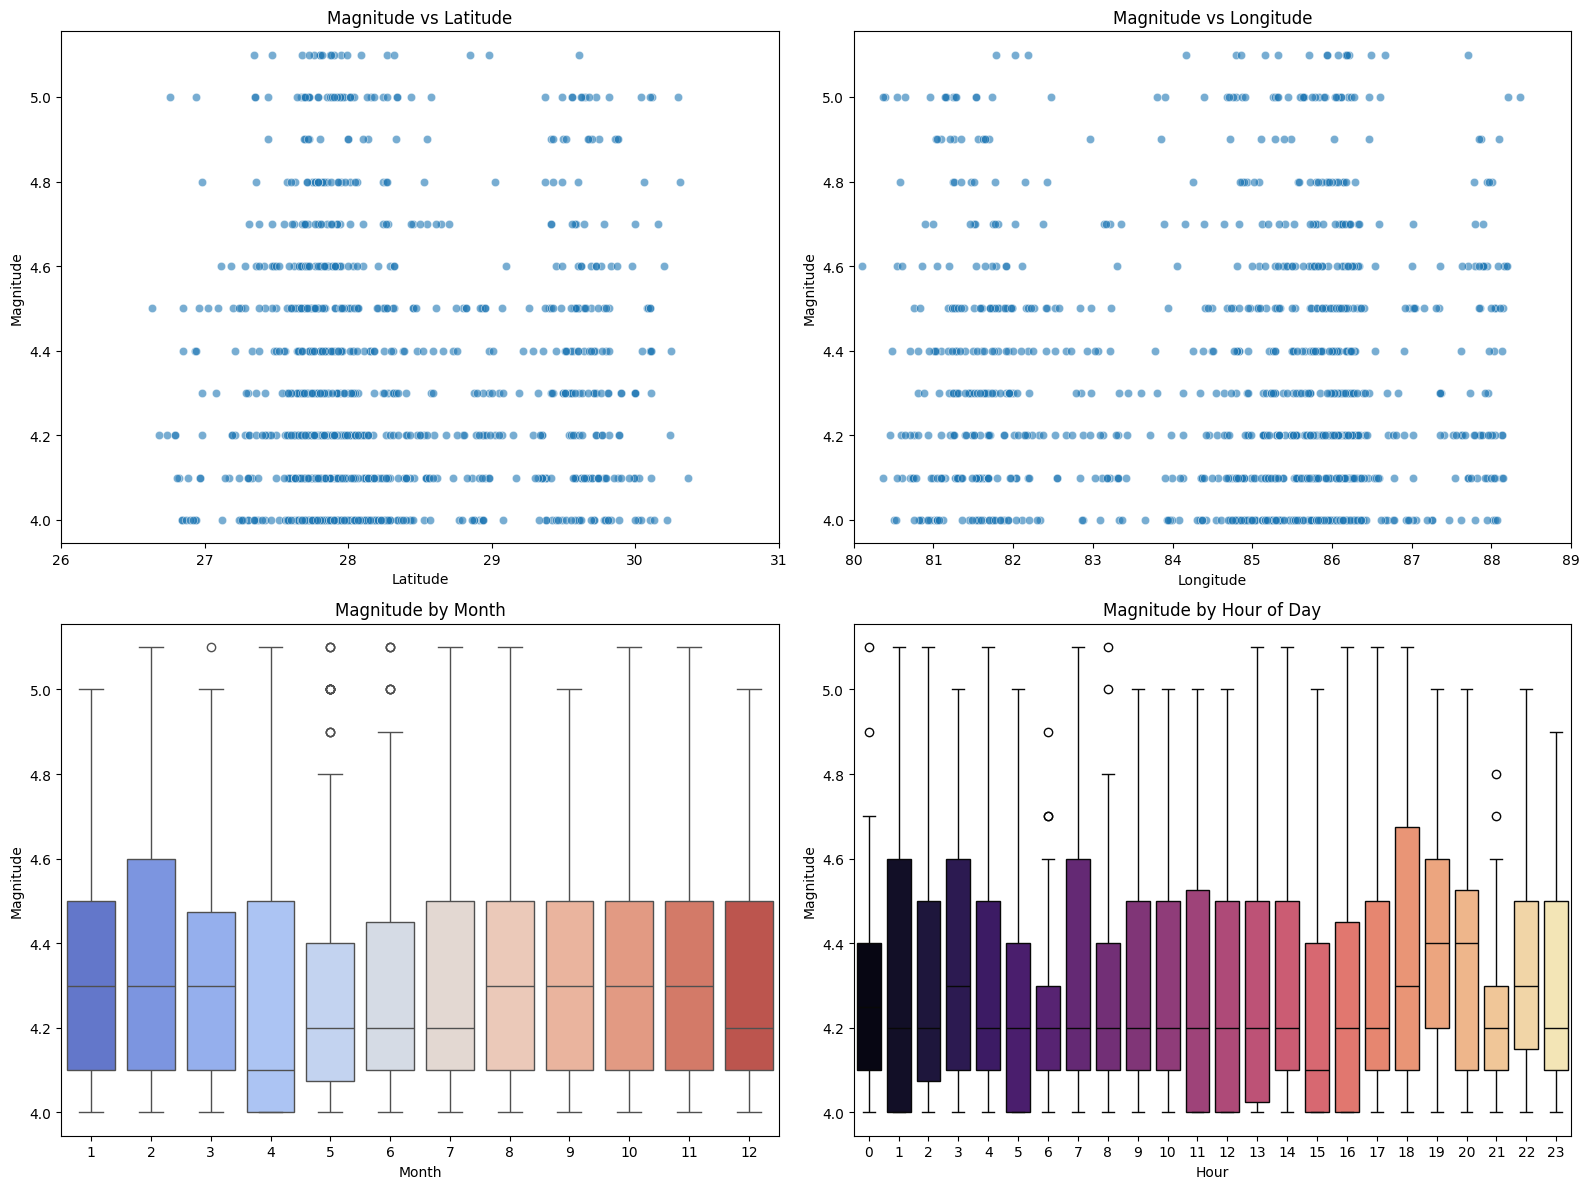

In [23]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['A.D. Date'] = pd.to_datetime(df['A.D. Date'], errors='coerce')
df['Month'] = df['A.D. Date'].dt.month

plt.figure(figsize=(16, 12))

# 1. Magnitude vs Latitude
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Latitude', y='Magnitude', alpha=0.6)
plt.title("Magnitude vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.xlim(26, 31)

# 2. Magnitude vs Longitude
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Longitude', y='Magnitude', alpha=0.6)
plt.title("Magnitude vs Longitude")
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.xlim(80, 89)

# 3. Magnitude vs Month
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Month', y='Magnitude', palette='coolwarm')
plt.title("Magnitude by Month")
plt.xlabel("Month")
plt.ylabel("Magnitude")

# 4. Magnitude vs Hour of Day
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Hour', y='Magnitude', palette='magma')
plt.title("Magnitude by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


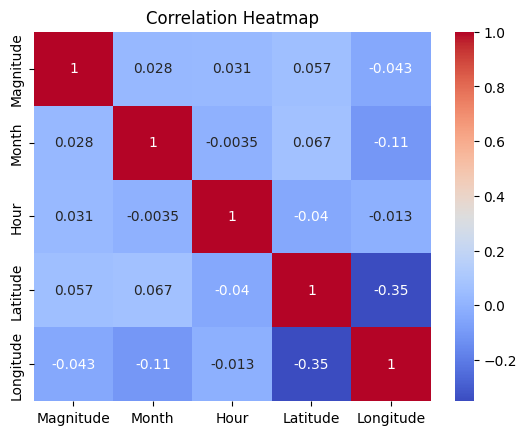

In [25]:
plt.figure()
sns.heatmap(df[['Magnitude','Month','Hour','Latitude','Longitude']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['Strong'] = (df['Magnitude'] >= 5.0).astype(int)
# Select features and drop missing
features = ['Latitude', 'Longitude', 'Month', 'Hour']
df = df.dropna(subset=features + ['Strong'])

X = df[features]
y = df['Strong']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "ROC_AUC": roc_auc
    })

# Convert results to DataFrame and rank
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)

print(results_df)


                             Model   ROC_AUC
0           Support Vector Machine  0.584891
1              K-Nearest Neighbors  0.572040
2                    Random Forest  0.552375
3                      Naive Bayes  0.540498
4                    Decision Tree  0.506620
5  Quadratic Discriminant Analysis  0.475078
6                Gradient Boosting  0.425039
7              Logistic Regression  0.399533
8     Linear Discriminant Analysis  0.398754
